## TF HUB Style Transfer

We will be using the tf hub **'arbitrary-image-stylization-v1-256/2'** for fast style transfer

In [1]:
import tensorflow as tf
import re
import urllib
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import gridspec
from IPython import display
from PIL import Image

## Downloading Content and Style files

In [2]:
def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp|JPG)', 
                        imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath

## Select the content and style images from the dropdown

In [3]:
# This is the path to the image you want to transform.
target_url = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/flowers.jpg" #@param ["https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/flowers.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/blank-sign.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/close-squirrel.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/escalante.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/ferns.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/among-giants.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/large-pumpkin.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/on-the-road.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/road.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/seychelles-flora.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/tractor.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/wild-flowers.jpg"]
target_path = download_image_from_URL(target_url)
# This is the path to the style image.
style_url = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/blank-sign.jpg" #@param ["https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/blank-sign.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/among-giants.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/close-squirrel.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/escalante.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/ferns.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/flowers.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/large-pumpkin.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/on-the-road.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/road.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/seychelles-flora.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/tractor.jpg", "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch12/wild-flowers.jpg"]
style_path = download_image_from_URL(style_url) 

# Display Content and Style images

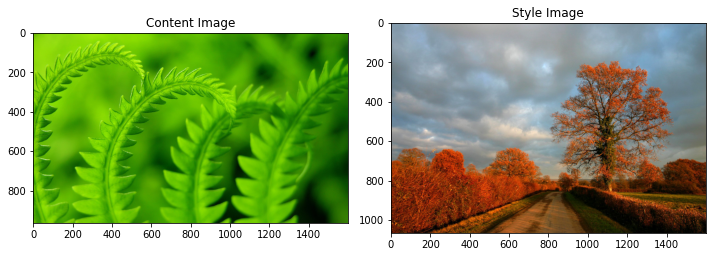

In [4]:
content = Image.open(target_path)
style = Image.open(style_path)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(content)
plt.title('Content Image')

plt.subplot(1, 2, 2)
plt.imshow(style)
plt.title('Style Image')

plt.tight_layout()
plt.show()

# Function for Image to Tensor


In [5]:
def image_to_tensor_style(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    img = tf.image.resize(img, [256,256])
    img = img[tf.newaxis, :]
    return img

In [6]:
def image_to_tensor_target(path_to_img, image_size):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    img = tf.image.resize(img, [image_size,image_size],preserve_aspect_ratio=True)
    img = img[tf.newaxis, :]
    return img

# Create tensors for Content and Style image data

In [7]:
output_image_size = 400 # @param {type:"integer"}

target_image = image_to_tensor_target(target_path,output_image_size)
style_image = image_to_tensor_style(style_path)

## Hub Module

Loading the Hub Mofule required for the task

In [8]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Perform the style transfer

In [9]:
outputs = hub_module(tf.constant(target_image), tf.constant(style_image))
stylized_image = outputs[0]



#Converting the tensor to image for visualisation

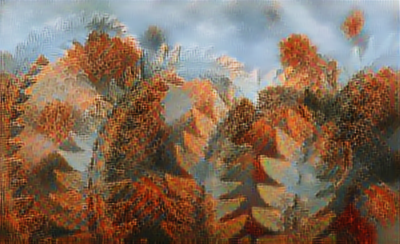

In [10]:
tensor = stylized_image*256
tensor = np.array(tensor, dtype=np.uint8)
tensor = tensor[0]
PIL.Image.fromarray(tensor)

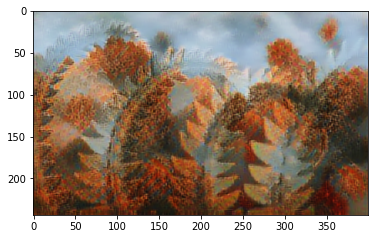

In [11]:
plt.imshow(tensor)